<center><img src="https://www.megabagus.id/wp-content/uploads/2024/06/Bootcamp-Data-Science.png" alt="Bootcamp-Data-Science" border="0">

# Modul 23 - Portolio Regresi
Mentor: Mega Bagus Herlambang, PhD

<hr>

<br>

## 1. Menggabungkan Semua Dengan Pipeline

In [111]:
# Mengimpor library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [112]:
# Menghilangkan warning
import warnings
warnings.filterwarnings("ignore")

In [113]:
# Pastikan sudah menginstall library shap (hilangkan tanda # di bawah)
#conda install shap

In [114]:
# Mengimpor shap
import shap

In [115]:
# Pastikan sudah menginstall xlrd (hilangkan tanda # di bawah)
#!conda install xlrd

Sumber data: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

### Edit ketiga item di bawah ini:

In [118]:
# Tentukan nama file, target, dan jumlah fold untuk cross validation

# Tulis nama file di sini lengkap dengan extension-nya dalam format string
nama_file = 'Real estate valuation data set.xlsx'

# Tulis nama variabel targetnya dalam format string
target = 'House price'

# Tulis jumlah fold (integer) untuk cross validation
cv = 10

In [119]:
# Load dataset (sesuaikan apakah dia csv, excel, dll)
df = pd.read_excel(nama_file)

# Melihat tampilan dataset
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [120]:
# Melihat nama kolom
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [121]:
# Merubah nama kolom (pastikan tidak ada salah ketik nama kolom)
df.rename(columns={'X1 transaction date': 'Date', 
                   'X2 house age': 'House age',
                   'X3 distance to the nearest MRT station': 'Distance to MRT',
                   'X4 number of convenience stores':'Minimarket',
                   'X5 latitude': 'Latitude',
                   'X6 longitude': 'Longtuade',
                   'Y house price of unit area': 'House price'}, inplace=True)

In [122]:
# Melihat datanya lagi
df.head()

,No,Date,House age,Distance to MRT,Minimarket,Latitude,Longtuade,House price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [123]:
# Kita lihat ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               414 non-null    int64  
 1   Date             414 non-null    float64
 2   House age        414 non-null    float64
 3   Distance to MRT  414 non-null    float64
 4   Minimarket       414 non-null    int64  
 5   Latitude         414 non-null    float64
 6   Longtuade        414 non-null    float64
 7   House price      414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [124]:
# Melihat jumlah nilai unik di setiap kolom
for i in df.columns:
    print(i,'=',len(df[i].unique()))

No = 414
Date = 12
House age = 236
Distance to MRT = 259
Minimarket = 11
Latitude = 234
Longtuade = 232
House price = 270


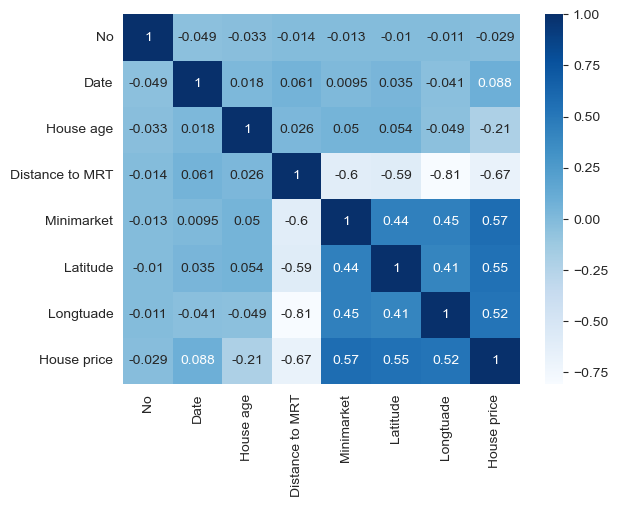

In [125]:
# Correlation matrix
sns.set_style("white")
sns.heatmap(df.corr(), cmap="Blues", annot=True);

In [126]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype=='O' and var!=target]
var_numerik = [var for var in df.columns if df[var].dtype!='O' and var!=target]

# Melihat variabel yang sudah dipisah
print(var_kategori)
print(var_numerik)

[]
['No', 'Date', 'House age', 'Distance to MRT', 'Minimarket', 'Latitude', 'Longtuade']


In [127]:
# Mengecek data kosong
df.isnull().mean()

No                 0.0
Date               0.0
House age          0.0
Distance to MRT    0.0
Minimarket         0.0
Latitude           0.0
Longtuade          0.0
House price        0.0
dtype: float64

In [128]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop([target], axis=1),
    df[target],
    test_size = 0.2,
    random_state = 0)

# Reset indeks dengan looping
for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

# Melihat dimensi training dan test set
X_train.shape, X_test.shape

((331, 7), (83, 7))

In [129]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

Sekarang kita akan uji coba membuat model regresi menggunakan `LinearRegression()`.

In [131]:
# Membuat Pipeline untuk modeling
model_reg = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regresi', LinearRegression())
])

In [132]:
# Mengeksekusi Pipeline akhir
model_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['No', 'Date', 'House age',
                                                   'Distance to MRT',
                                                   'Minimarket', 'Latitude',
                                                   'Longtuade']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('regresi', LinearRegression())])

In [133]:
# Mencoba memprediksi training set (5 baris pertama)
model_reg.predict(X_train)[:5]

array([30.92500862, 35.97531393, 32.97959201, 42.20468809, 46.42516744])

Untuk melihat koefisien intercept dan koefisien variabel independen lainnya, kita menggunakan cara yang berbeda untuk Pipeline, di mana kita harus menuliskan nama *step*nya di Pipeline.

In [135]:
# Melihat intercept
print(model_reg['regresi'].intercept_)

# Melihat koefisien
print(model_reg['regresi'].coef_)

33.87299921070827
[ -1.83792422   4.46911233 -11.50993089 -29.20386875  10.81079316
  18.65586459  -0.91405888]


In [136]:
# Melihat nama kolom preprocessing
print(model_reg['preprocessing'].get_feature_names_out())

['No' 'Date' 'House age' 'Distance to MRT' 'Minimarket' 'Latitude'
 'Longtuade']


In [137]:
# Looping untuk mencetak persamaan regresi linear
for i,j in enumerate(model_reg['regresi'].coef_):
    if i == 0:
        print(str(target),'=',model_reg['regresi'].intercept_,'+',model_reg['regresi'].coef_[i],'*',model_reg['preprocessing'].get_feature_names_out()[i],'+')
    elif i != len(model_reg['regresi'].coef_)-1:
        print(model_reg['regresi'].coef_[i],'*',model_reg['preprocessing'].get_feature_names_out()[i],'+')
    else:
        print(model_reg['regresi'].coef_[i],'*',model_reg['preprocessing'].get_feature_names_out()[i])

House price = 33.87299921070827 + -1.8379242241248934 * No +
4.469112334488368 * Date +
-11.509930890583218 * House age +
-29.203868746247185 * Distance to MRT +
10.81079316419994 * Minimarket +
18.655864589613195 * Latitude +
-0.9140588837244251 * Longtuade


<br><hr><br>

## 2. Evaluasi Model

Sekarang kita akan coba menggunakan formula di atas untuk memprediksi nilai Profit yang ada di training set menggunakan variabel independen di *training set*, kemudian nanti membandingkan hasilnya dengan `y_train`.

<br>

### 2.1 Evaluasi di *Training Set*

In [143]:
# Memprediksi X_train dan membandingkannya hasilnya dengan y_train
pred_train = model_reg.predict(X_train)

In [144]:
# Hasil prediksi training set
pred_train = pd.DataFrame(pred_train, columns=[target])
pred_train.head()

,House price
0,30.925009
1,35.975314
2,32.979592
3,42.204688
4,46.425167


In [145]:
# Membandingkan 2 numpy array (kita gunakan np.column_stack untuk menggabungkan kedua array ini)
banding_train = pd.DataFrame(np.column_stack((pred_train, pd.DataFrame(y_train), abs(pred_train - pd.DataFrame(y_train)))), columns=['Prediksi', 'Asli', 'Error'])
banding_train.head()

,Prediksi,Asli,Error
0,30.925009,23.2,7.725009
1,35.975314,29.3,6.675314
2,32.979592,38.4,5.420408
3,42.204688,37.5,4.704688
4,46.425167,34.3,12.125167


In [146]:
# Menghitung nilai rata-rata dari error yang sudah dibuat absolut (MAE = Mean absolute error)
banding_train.describe()

,Prediksi,Asli,Error
count,331.000000,331.000000,331.000000
mean,37.976435,37.976435,6.191354
std,10.318347,13.711788,6.564741
min,1.740613,7.600000,0.010225
25%,33.066715,27.500000,2.379609
50%,39.786496,38.100000,4.710294
75%,45.502425,46.600000,8.417834
max,54.590499,117.500000,75.319652


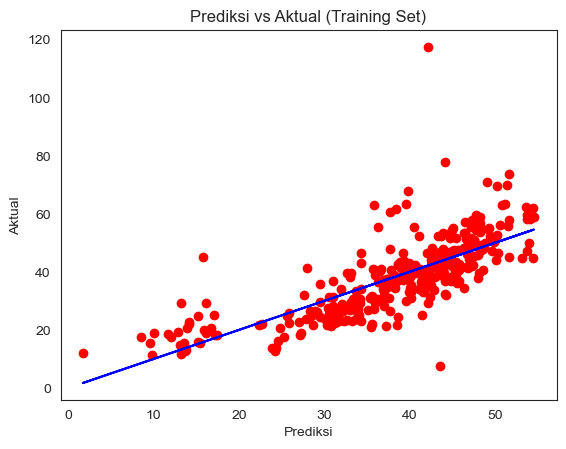

In [147]:
# Visualisasi hasil Training Set
plt.scatter(pred_train, y_train, color = 'red')
plt.plot(pred_train, model_reg.predict(X_train), color = 'blue')
plt.title('Prediksi vs Aktual (Training Set)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

<br>

### 2.2 Menghitung *Metrics* di *Training Set*

In [150]:
# Menghitung nilai error (MAE, MSE, RMSE) di Training Set
from sklearn import metrics
print('MAE = {}'.format(metrics.mean_absolute_error(y_train, pred_train)))           # MAE adalah nilai error rata-rata seperti yang ada di tabel banding_train
print('MSE = {}'.format(metrics.mean_squared_error(y_train, pred_train)))            # penulisan {0:.2f} adalah untuk menuliskan 2 angka di belakang koma
print('RMSE = {}'.format(np.sqrt(metrics.mean_squared_error(y_train, pred_train))))
print('R2 = {}'.format(metrics.r2_score(y_train, pred_train)))

MAE = 6.191353582405047
MSE = 81.29848905414087
RMSE = 9.016567476270605
R2 = 0.566281122050213


In [151]:
# Cara lain menghitung R2
R2 = model_reg.score(X_train, y_train)
print('Coefficient of Determination (R2) = {0:.2f}'.format(R2))

Coefficient of Determination (R2) = 0.57


<br>

### 2.3 Evaluasi di *Test Set*

In [154]:
# Memprediksi hasil Test set
pred_test = model_reg.predict(X_test)

In [155]:
# Hasil prediksi test set
pred_test = pd.DataFrame(pred_test, columns=[target])
pred_test.head()

,House price
0,39.583643
1,12.953776
2,41.925619
3,12.047437
4,42.060323


In [156]:
# Membandingkan 2 numpy array (kita gunakan np.column_stack untuk menggabungkan kedua array ini)
banding_test = pd.DataFrame(np.column_stack((pred_test, pd.DataFrame(y_test), abs(pred_test - pd.DataFrame(y_test)))), columns=['Prediksi', 'Asli', 'Error'])
banding_test

,Prediksi,Asli,Error
0,39.583643,45.3,5.716357
1,12.953776,14.4,1.446224
2,41.925619,46.0,4.074381
3,12.047437,15.6,3.552563
4,42.060323,50.2,8.139677
...,...,...,...
78,46.655282,53.0,6.344718
79,45.172897,38.2,6.972897
80,47.709884,46.7,1.009884
81,29.949724,24.6,5.349724


In [157]:
# Menghitung nilai rata-rata dari error yang sudah dibuat absolut di test set (MAE = Mean absolute error)
banding_test.describe()

,Prediksi,Asli,Error
count,83.000000,83.000000,83.000000
mean,38.343589,37.995181,5.776297
std,10.366487,13.259611,5.171941
min,7.260712,12.900000,0.027519
25%,33.869039,28.450000,1.990042
50%,40.974351,39.300000,4.425854
75%,45.464055,46.050000,7.939483
max,53.156216,78.300000,33.457761


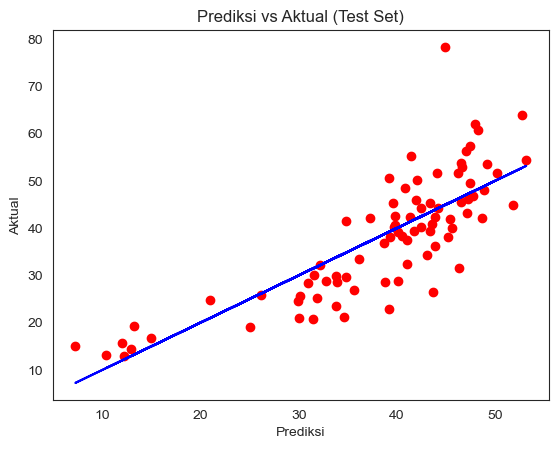

In [158]:
# Visualisasi hasil Test Set
plt.scatter(pred_test, y_test, color = 'red')
plt.plot(pred_test, model_reg.predict(X_test), color = 'blue')
plt.title('Prediksi vs Aktual (Test Set)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

<br>

### 2.4 Menghitung metrics di *test set*

In [161]:
# Menghitung nilai error (MAE, MSE, RMSE) di Test Set
print('MAE = {0:.2f}'.format(metrics.mean_absolute_error(y_test, pred_test)))           # MAE adalah nilai error rata-rata seperti yang ada di tabel banding_train
print('MSE = {0:.2f}'.format(metrics.mean_squared_error(y_test, pred_test)))            # penulisan {0:.2f} adalah untuk menuliskan 2 angka di belakang koma
print('RMSE = {0:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred_test))))
print('R2 = {0:.2f}'.format(metrics.r2_score(y_test, pred_test)))

MAE = 5.78
MSE = 59.79
RMSE = 7.73
R2 = 0.66


In [162]:
# Cara lain menghitung R2
R2 = model_reg.score(X_test, y_test)
print('Coefficient of Determination (R2) = {0:.2f}'.format(R2))

Coefficient of Determination (R2) = 0.66


In [163]:
# Menghitung nilai R2 secara cepat
print(f'Nilai R2 training set = {model_reg.score(X_train, y_train):.2f}')
print(f'Nilai R2 training set = {model_reg.score(X_test, y_test):.2f}')

Nilai R2 training set = 0.57
Nilai R2 training set = 0.66


<br>

<hr>

## 3. *Cross Validation* di Python

Kita akan menggunakan beberapa model regresi sekaligus.<br> 
Kemudian model terbaik dipilih menggunakan *k-fold cross validation*.

In [168]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop([target], axis=1),
    df[target],
    test_size = 0.2,
    random_state = 0)

# Reset indeks dengan looping
for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

# Melihat dimensi training dan test set
X_train.shape, X_test.shape

((331, 7), (83, 7))

In [169]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

Sekarang kita akan mendefinisikan beberapa model kemudian diikuti dengan *hyperparameter tuning*.

<br>

### 3.1. Linear Regression

Ini merupakan model regresi linear standar dari scikit-learn.

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [174]:
# Model regresi Linear
linreg = LinearRegression()

# Pipeline model regresi linear
mod_linreg = Pipeline([
    ('preprocessing', preprocessor),
    ('linreg', linreg)
])

# Hyperparameter tuning Linear Regression
param_linreg = {}

<br>

### 3.2. Lasso Regression

*Lasso regression* merupakan regresi linear dengan penggunaan penalti L1.

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [178]:
# Model regresi Lasso
lasso = Lasso(alpha=0.001, random_state=0)

# Pipeline model regresi lasso
mod_lasso = Pipeline([
    ('preprocessing', preprocessor),
    ('lasso', lasso)
])

# Hyperparameter tuning regresi Lasso
param_lasso = {'lasso__alpha': np.arange(0.01, 1.0, 0.01)}

<br>

### 3.3. Ridge Regression

*Ridge regression* adalah regresi linear dengan penggunaan penalti L2.

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html

In [182]:
# Model regresi Ridge
ridge = Ridge(alpha=0.5)

# Pipeline model regresi Ridge
mod_ridge = Pipeline([
    ('preprocessing', preprocessor),
    ('ridge', ridge)
])

# Hyperparameter tuning regresi Lasso
param_ridge = {'ridge__alpha': np.arange(0.01, 1.0, 0.01),
              'ridge__solver': ['auto','svd', 'lsqr']
              }

<br>

### 3.4 Elastic Net

*Elastic net* merupakan regresi linear dengan penalti L1 dan L2.

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

In [186]:
# Model regresi ElasticNet
enet = ElasticNet(random_state=0)

# Pipeline model regresi Elastic Net
mod_enet = Pipeline([
    ('preprocessing', preprocessor),
    ('enet', enet)
])

# Hyperparameter tuning Elastic Net
param_enet = {
    'enet__alpha': [0.01, 0.1, 0.5],
    'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 1]
    }

<br>

### 3.5 Decision Tree Regressor

Algoritma *decision tree regressor* merupakan algoritma *decision tree* yang ditujukan untuk permasalahan regresi.

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [190]:
# Model regresi Decision Tree
dt = DecisionTreeRegressor(random_state=0)

# Pipeline model regresi Decision Tree
mod_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('dt', dt)
])

# Hyperparameter tuning regresi Decision Tree
param_dt = {
    'dt__splitter': ['best','random'],
    'dt__max_depth': np.arange(1,10), 
    'dt__min_samples_split': np.arange(2,10),
    'dt__min_samples_leaf': np.arange(1,5)
    }

<br>

### 3.6. Random Forest Regressor

Algoritma *random forest* merupakan algoritma *random forest* (gabungan beberapa *decision tree*) yang digunakan untuk permasalahan regresi.<br>
*Random forest* masuk ke dalam kategori *ensemble models* (model gabungan).

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [194]:
# Model regresi Random Forest
rf = RandomForestRegressor(random_state=0)

# Pipeline model regresi Random Forest
mod_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', rf)
])

# Hyperparameter tuning regresi Random Forest
param_rf = {
    'rf__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
    'rf__min_samples_split': np.arange(2,10),
    'rf__min_samples_leaf': np.arange(1,5)
    }

<br>

### 3.7 K-Nearest Neighbor Regressor (KNN Regressor)

Regresi berdasarkan algoritma KNN.

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [198]:
# Model regresi KNN
knn = KNeighborsRegressor(n_neighbors=5)

# Pipeline model regresi Random Forest
mod_knn = Pipeline([
    ('preprocessing', preprocessor),
    ('knn', knn)
])

# Hyperparameter tuning regresi Random Forest
param_knn = {
    'knn__n_neighbors': [1, 2, 3, 4, 5],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

<br>

### 3.8. Support Vector Regressor

*Support Vector Regressor* merupakan model regresi dengan menggunakan algoritma SVM (*Support Vector Machine*).

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [203]:
# Model regresi SVR
svr = svm.SVR(C=1.0, epsilon=0.2)

# Pipeline model regresi SVR
mod_svr = Pipeline([
    ('preprocessing', preprocessor),
    ('svr', svr)
    ])

# Hyperparameter tuning SVR
param_svr = {
    'svr__kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
    'svr__degree':[3,5,7], 
    'svr__gamma':['scale', 'auto'], 
    'svr__C':[1,2,3],
    'svr__epsilon':[0.1, 0.2, 0.3] 
    }

<br>

### 3.9. Gradient Boosting

Algoritma *gradient boosting* termasuk ke dalam *ensemble models*.

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [207]:
# Model regresi Gradient Boosting
gb = GradientBoostingRegressor(loss='huber',criterion='squared_error',random_state=0)

# Pipeline model regresi Gradient Boosting
mod_gb = Pipeline([
    ('preprocessing', preprocessor),
    ('gb', gb)
    ])

# Hyperparameter tuning Gradient Boosting
param_gb = {
    'gb__n_estimators':[200, 250, 350, 400], #default 100
    'gb__learning_rate':[0.75, 0.1, 1.25], #default 0.1
    'gb__max_depth':[2], #default 3
    'gb__min_samples_split':[5, 6, 7, 8], #default 2
    'gb__min_samples_leaf':[1, 2, 3] # default 1
    }

<br>

### 3.10 XGBoost

XGBoost adalah model *gradient boosting* yang dioptimasi sehingga prosesnya relatif lebih cepat dan lebih efisien.

Dokuentasi: https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [211]:
# Model regresi XGBoost
xgb = XGBRegressor()

# Pipeline model regresi XGBoost
mod_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb',xgb)
    ])

# Hyperparameter tuning regresi XGBoost
param_xgb = {
    'xgb__learning_rate':[0.01, 0.05, 0.1],
    'xgb__n_estimators':[200, 300, 400]
    }

<br>

### 3.11 LightGBM Regressor

LightGBM regressor adalah *gradient boosting* yang dikembangkan oleh Microsoft.

Dokumentasi: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

In [215]:
# Model regresi LightGBM
lgb = LGBMRegressor(force_col_wise=True, 
                    verbose = -1,
                    random_state=0)

# Pipeline model regresi LightGBM
mod_lgb = Pipeline([
    ('preprocessing', preprocessor),
    ('lgb', lgb)   
    ])

# Hyperparameter tuning regresi LightGBM
param_lgb = {
    'lgb__learning_rate':[0.01, 0.05, 0.1, 0.2],
    'lgb__n_estimators':[200, 300, 400]
    }

<br>

### 3.12 Multi Layer Perceptron (MLP)

MLP merupakan model regresi dengan menggunakan arsitektur *neural network*.<br>
Untuk *neural network* kali ini kita menggunakan library scikit-learn.

Dokumentasi: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [220]:
# Model regresi MLP
mlp = MLPRegressor(random_state=0, max_iter=5000)

# Pipeline model regresi MLP
mod_mlp = Pipeline([
    ('preprocessing', preprocessor),
    ('mlp', mlp)   
    ])

# Hyperparameter tuning regresi MLP
param_mlp = {
    'mlp__hidden_layer_sizes': [(100,),(200,),(300,)],
    'mlp__activation':['identity', 'logistic', 'tanh', 'relu'],
    'mlp__solver':['sgd', 'adam']
    }

<br>

Sekarang kita akan mentraining semua model di atas dan mengevaluasinya langsung menggunakan *10-fold cross validation*.

Perlu diperhatikan bahwa kita belum mengimplementasikan *hyperparameter tuning*.

Dokumentasi tipe *scoring* yang bisa dipakai di *cross validation* dapat dilihat melalui link berikut:<br>
https://scikit-learn.org/stable/modules/model_evaluation.html

In [224]:
# Model training dengan cross validation
daftar_model = [mod_linreg, mod_lasso, mod_ridge, mod_enet, mod_dt, mod_rf, mod_knn, mod_svr, mod_gb, mod_xgb, mod_lgb, mod_mlp]
daftar_nama_model = ['linreg', 'lasso', 'ridge', 'elastic', 'dt', 'rf', 'knn', 'svr', 'gb', 'xgb', 'lgb', 'mlp']
mean_mae = []
mean_r2 = []
std_mae = []
std_r2 = []
test_score_mae = []
test_score_r2 = []

# Setting parameter jika permasalahannya adalah klasifikasi
# skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
# tentukan cv = skf jika ingin stratified cross validation

# Looping untuk setiap model yang sudah disiapkan 
for i in daftar_model:
    
    # Melakukan cross validation dan menggunakan kriteria berdasarkan skor MAE dan R2
    cv_mae = -cross_val_score(i, X_train, y_train, cv=10, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)  # kita kalikan dengan -1 karena scoring menggunakan nilai negatif
    cv_r2 = cross_val_score(i, X_train, y_train, cv=10, scoring='r2', verbose=1, n_jobs=-1) # n_jobs=-1 artinya kita gunakan semua prerocessor
    
    # Menghitung nilai rata-rata MAE dan R2 dan menambahkannya ke variabel mean_mae dan mean_r2
    mean_mae.append(round(cv_mae.mean(),2))   # round(nilai,2) untuk membulatkan nilai 2 angka di belakang koma
    mean_r2.append(round(cv_r2.mean(),2))
    
    # Menghitung nilai standar deviasi MAE dan R2 dan menambahkannya ke variabel std_mae dan std_r2
    std_mae.append(round(cv_mae.std(),2))
    std_r2.append(round(cv_r2.std(),2))
    
    # Melakukan fitting training set kemudian melakukan prediksi  di test set
    i.fit(X_train, y_train)
    i_predict = i.predict(X_test)
    
    # Menghitung nilai rata-rata MAE dan R2 di test set dan menambahkannya ke variabel test_score_mae dan test_core_r2
    test_score_mae.append(round(mean_absolute_error(y_test, i_predict),2))
    test_score_r2.append(round(r2_score(y_test, i_predict),2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.0s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [225]:
# Membuat DataFrame
cv_mae = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_mae, 'std':std_mae, 'Test_Score':test_score_mae})
cv_r2 = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_r2, 'std':std_r2, 'Test_Score':test_score_r2})

In [226]:
# Melihat hasil cross validation berdasarkan MAE
cv_mae

,model,Train_Mean,std,Test_Score
0,linreg,6.37,0.83,5.78
1,lasso,6.37,0.83,5.78
2,ridge,6.38,0.83,5.77
3,elastic,9.92,1.03,9.87
4,dt,6.33,1.32,6.95
5,rf,4.96,0.76,4.89
6,knn,6.29,1.05,5.79
7,svr,6.27,0.78,6.59
8,gb,4.84,0.43,4.38
9,xgb,5.51,0.64,5.16


In [227]:
# Mengurutkan skor dari kecil ke besar
cv_mae_urut = cv_mae.sort_values(by=['Train_Mean','Test_Score'],  ignore_index=True)
cv_mae_urut

,model,Train_Mean,std,Test_Score
0,gb,4.84,0.43,4.38
1,rf,4.96,0.76,4.89
2,mlp,5.21,0.81,4.95
3,lgb,5.25,0.64,4.86
4,xgb,5.51,0.64,5.16
5,svr,6.27,0.78,6.59
6,knn,6.29,1.05,5.79
7,dt,6.33,1.32,6.95
8,linreg,6.37,0.83,5.78
9,lasso,6.37,0.83,5.78


In [228]:
# Melihat hasil cross validation berdasarkan R2
cv_r2

,model,Train_Mean,std,Test_Score
0,linreg,0.55,0.14,0.66
1,lasso,0.55,0.14,0.66
2,ridge,0.55,0.14,0.65
3,elastic,0.11,0.04,0.14
4,dt,0.48,0.23,0.21
5,rf,0.68,0.14,0.70
6,knn,0.54,0.16,0.64
7,svr,0.53,0.13,0.54
8,gb,0.69,0.11,0.75
9,xgb,0.61,0.13,0.65


In [229]:
# Mengurutkan skor dari besar ke kecil
cv_r2_urut = cv_r2.sort_values(by=['Train_Mean','Test_Score'], ascending=False, ignore_index=True)
cv_r2_urut

,model,Train_Mean,std,Test_Score
0,gb,0.69,0.11,0.75
1,rf,0.68,0.14,0.70
2,mlp,0.66,0.13,0.73
3,lgb,0.65,0.14,0.73
4,xgb,0.61,0.13,0.65
5,linreg,0.55,0.14,0.66
6,lasso,0.55,0.14,0.66
7,ridge,0.55,0.14,0.65
8,knn,0.54,0.16,0.64
9,svr,0.53,0.13,0.54


<br><hr>
<br>

## 4. *Hyperparameter Tuning*

Sebenarnya kita sudah cukup puas dengan model regresi linear di atas.

Namun performa di atas bisa ditingkatkan lagi dengan memilih parameter terbaik di setiap modelnya.

Parameter yang diotak-atik (*tuning*) di setiap model ini kita tentukan sebelum model-model tersbeut di*training*.
Selama proses *training*, nilai parameter ini tidak akan berubah.

Nilai parameter yang kita *setting* di awal ini disebut dengan ***hyperparameter***.

Untuk melakukan *hyperparameter tuning* kita gunakan modul <code>GridSearchCV()</code>.<br>
**GridSearchCV()** akan mencoba semua kombinasi parameter yang sudah kita sediakan. Semakin banyak parameter dan semakin besar nilai k untuk CV maka semakin lama prosesnya.

<code>GridSearchCV()</code> akan mengevaluasi semua settingan dari *hyperparameter* yang sudah disiapkan dan mempertahankan *setting*-an terbaik sampai selesai (setelah mencoba semua kombinasi *hyperparameter* dan semua *fold* di *cross validation*).

Dokumentasi dari <code>GridSearchCV()</code> bisa dilihat melalui link berikut:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Dalam melakukan *hyperparameter tuning*, jumlah *fold* yang kita gunakan kali ini adalah 10.

In [ ]:
# Model training dengan GridSearchCV
daftar_model = [mod_linreg, mod_lasso, mod_ridge, mod_enet, mod_dt, mod_rf, mod_knn, mod_svr, mod_gb, mod_xgb, mod_lgb, mod_mlp]
daftar_nama_model = ['linreg', 'lasso', 'ridge', 'elastic', 'dt', 'rf', 'knn', 'svr', 'gb', 'xgb', 'lgb', 'mlp']
daftar_param_model = [param_linreg, param_lasso, param_ridge, param_enet, param_dt, 
                     param_rf, param_knn, param_svr, param_gb, param_xgb, param_lgb, param_mlp]

# Nilai yang akan diisikan
mae_tuning = []
mae_tuning_test = []
r2_tuning = []
r2_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan GridSearchCV
    model_grid_cv = GridSearchCV(
    daftar_model[i],
    daftar_param_model[i],
    cv=10,
    verbose=1,
    n_jobs=-1
    ).fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=[target])
    pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=[target])

    # Mencatat skor MAE training dan test set
    mae_tuning.append(mean_absolute_error(y_train, pred_train))
    mae_tuning_test.append(mean_absolute_error(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    r2_tuning.append(r2_score(y_train, pred_train))
    r2_tuning_test.append(r2_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_grid_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_grid_cv.best_estimator_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 99 candidates, totalling 990 fits
Fitting 10 folds for each of 297 candidates, totalling 2970 fits
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Fitting 10 folds for each of 576 candidates, totalling 5760 fits
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [ ]:
# Membuat DataFrame sekaligus kita urutkan
grid_mae = pd.DataFrame({'model':daftar_nama_model, 'Training':mae_tuning, 'Testing':mae_tuning_test})
grid_mae_urut = grid_mae.sort_values(by='Testing',  ignore_index=True)

grid_r2 = pd.DataFrame({'model':daftar_nama_model, 'Training':r2_tuning, 'Testing':r2_tuning_test})
grid_r2_urut = grid_r2.sort_values(by='Testing', ascending=False, ignore_index=True)

Kita pilih model terbaik berdasarkan performanya di *Test Set*.

In [ ]:
# Melihat performa tuning berdasarkan MAE
grid_mae_urut

In [ ]:
# Melihat performa tuning berdasarkan R2
grid_r2_urut

In [ ]:
# Parameter terbaik dari model terbaik
grid_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param})
grid_param

In [ ]:
# Estimator terbaik dari model terbaik
grid_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator})
grid_estimator

In [ ]:
# Kita gabungkan semua dan urutkan berdasarkan nilai R2 di test set sebagai 'model_best_param'
model_best_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param, 'Testing':r2_tuning_test})
model_best_param = model_best_param.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best_param

In [ ]:
# Kita gabungkan semua dan urutkan berdasarkan nilai R2 di test set sebagai 'model_best_estimator'
model_best_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator, 'Testing':r2_tuning_test})
model_best_estimator = model_best_estimator.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best_estimator

<br>

<br>

## 5.  Menggunakan Model Terbaik

Sekarang kita harus melakukan *fitting* akhir di mana kita akan mentraining parameter dari model terbaik terhadap dataset utuh (gabungan *training set* dan *test set*).

In [ ]:
# Kita cek dataset utuh df
df.head()

In [ ]:
# Kita bagi variabel independen dan dependen-nya
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Melihat variabel independen X
X.head()

In [ ]:
# Melihat variabel dependen y
y.head()

Training Ulang Model Akhir Dengan Dataset Utuh

In [ ]:
# Fitting ke dataset utuh
model_final = model_best_estimator['Param'][0].fit(X,y)

In [ ]:
# Melihat spesifikasi model_final
model_final

In [ ]:
# Menghitung importances
importances = model_final[1].feature_importances_
nama_feature = []
fitur = model_final['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))
model_importances = pd.Series(importances, index=nama_feature)
model_importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
model_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Plot Feature Importance Setiap Feature")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<br>

<br>

## 6. Menyimpan Model

Sekarang kita akan menyimpan modelnya untuk nanti bisa dipakai dan di*deploy*.

In [ ]:
# Library untuk menyimpan model
import pickle

In [ ]:
# Menyimpan model dengan nama 'model_regresi_terbaik.pkl'
pickle.dump(model_final, open('model_regresi_terbaik.pkl', 'wb'))

Sekarang kita akan coba memprediksi X_test menggunakan model yang sudah kita simpan.

In [ ]:
# Load lagi model yang sudah disimpan dan buka sebagai 'best_model'
best_model = pickle.load(open('model_regresi_terbaik.pkl', 'rb'))

In [ ]:
# Mencoba melakukan prediksi X_test
prediksi = best_model.predict(X_test)

# Melihat hasil prediksi
prediksi[:5]

In [ ]:
# Merubah dalam format DataFrame
prediksi = pd.DataFrame(prediksi, columns=[target])
prediksi

<br>
<br>

## 7. Feature Importance

Kita bisa melihat feature apa saja yang paling berpengaruh atau sering disebut dengan istilah *feature importance*.

In [ ]:
# Menyiapkan tabel untuk nanti diiterasi satu per satu
model_ft = model_best_estimator.set_index('model')
model_ft

<br>

#### 7.1 Model Linear Regression

In [ ]:
# Melihat pipeline model linreg
nama_model = model_ft.loc['linreg','Param']['linreg']
nama_model

In [ ]:
# Looping untuk mencetak persamaan regresi linear
for i,j in enumerate(nama_model.coef_):
    if i == 0:
        print(str(target),'=',nama_model.intercept_,'+',nama_model.coef_[i],'*',mod_linreg['preprocessing'].get_feature_names_out()[i],'+')
    elif i != len(nama_model.coef_)-1:
        print(nama_model.coef_[i],'*',mod_linreg['preprocessing'].get_feature_names_out()[i],'+')
    else:
        print(nama_model.coef_[i],'*',mod_linreg['preprocessing'].get_feature_names_out()[i])

In [ ]:
# Melihat nilai setiap koefisien
modelku = model_ft.loc['linreg','Param']
importance = modelku['linreg'].coef_
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))
print(f'Intercept \t     {nama_model.intercept_:.6f}')
model_importances = pd.Series(importance, index=nama_feature)
model_importances

In [ ]:
# Melakukan plotting feature importance
fig, ax = plt.subplots(figsize = (7,5))
model_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Plot Feature Importance Setiap Feature")
ax.set_ylabel("Nilai Koefisien")
fig.tight_layout()

#### 7.2 Model Lasso Regression

In [ ]:
# Melihat pipeline model lasso
nama_model = model_ft.loc['lasso','Param']['lasso']
nama_model

In [ ]:
# Looping untuk mencetak persamaan regresi lasso
for i,j in enumerate(nama_model.coef_):
    if i == 0:
        print(str(target),'=',nama_model.intercept_,'+',nama_model.coef_[i],'*',mod_lasso['preprocessing'].get_feature_names_out()[i],'+')
    elif i != len(nama_model.coef_)-1:
        print(nama_model.coef_[i],'*',mod_lasso['preprocessing'].get_feature_names_out()[i],'+')
    else:
        print(nama_model.coef_[i],'*',mod_lasso['preprocessing'].get_feature_names_out()[i])

In [ ]:
# Melihat nilai setiap koefisien
modelku = model_ft.loc['lasso','Param']
importance = modelku['lasso'].coef_
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))
print(f'Intercept \t   {nama_model.intercept_:.6f}')
model_importances = pd.Series(importance, index=nama_feature)
model_importances

In [ ]:
# Melakukan plotting feature importance
fig, ax = plt.subplots(figsize = (7,5))
model_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Plot Feature Importance Setiap Feature")
ax.set_ylabel("Nilai Koefisien")
fig.tight_layout()

<br>

#### 7.3 Model Ridge Regression

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['ridge','Param']['ridge']
nama_model

In [ ]:
# Looping untuk mencetak persamaan
for i,j in enumerate(nama_model.coef_):
    if i == 0:
        print(str(target),'=',nama_model.intercept_,'+',nama_model.coef_[i],'*',mod_lasso['preprocessing'].get_feature_names_out()[i],'+')
    elif i != len(nama_model.coef_)-1:
        print(nama_model.coef_[i],'*',mod_lasso['preprocessing'].get_feature_names_out()[i],'+')
    else:
        print(nama_model.coef_[i],'*',mod_lasso['preprocessing'].get_feature_names_out()[i])

In [ ]:
# Melihat nilai setiap koefisien
modelku = model_ft.loc['ridge','Param']
importance = modelku['ridge'].coef_
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))
print(f'Intercept \t   {nama_model.intercept_:.6f}')
model_importances = pd.Series(importance, index=nama_feature)
model_importances

In [ ]:
# Melakukan plotting feature importance
fig, ax = plt.subplots(figsize = (7,5))
model_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Plot Feature Importance Setiap Feature")
ax.set_ylabel("Nilai Koefisien")
fig.tight_layout()

<br>

#### 7.4 Model Elastic Net

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['elastic','Param']['enet']
nama_model

In [ ]:
# Looping untuk mencetak persamaan
for i,j in enumerate(nama_model.coef_):
    if i == 0:
        print(str(target),'=',nama_model.intercept_,'+',nama_model.coef_[i],'*',mod_lasso['preprocessing'].get_feature_names_out()[i],'+')
    elif i != len(nama_model.coef_)-1:
        print(nama_model.coef_[i],'*',mod_lasso['preprocessing'].get_feature_names_out()[i],'+')
    else:
        print(nama_model.coef_[i],'*',mod_lasso['preprocessing'].get_feature_names_out()[i])

In [ ]:
# Melihat nilai setiap koefisien
modelku = model_ft.loc['elastic','Param']
importance = modelku['enet'].coef_
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))
print(f'Intercept \t     {nama_model.intercept_:.6f}')
model_importances = pd.Series(importance, index=nama_feature)
model_importances

In [ ]:
# Melakukan plotting feature importance
fig, ax = plt.subplots(figsize = (7,5))
model_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Plot Feature Importance Setiap Feature")
ax.set_ylabel("Nilai Koefisien")
fig.tight_layout()

<br>

#### 7.5 Model Decision Tree

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['dt','Param']['dt']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['dt','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

"Mean Decrease Impurity" adalah cara untuk mengukur seberapa banyak setiap pertanyaan (atau fitur) membantu dalam mengorganisir data kita. Kata "impurity" berarti seberapa tercampur atau berantakannya sesuatu. Jika sebuah pertanyaan (atau fitur) membantu memisahkan data menjadi kelompok yang lebih bersih dan terorganisir, maka ia mendapatkan skor "Mean Decrease Impurity" yang lebih tinggi.

<br>

#### 7.6 Model Random Forest

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['rf','Param']['rf']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['rf','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

<br>

#### 7.7 Model KNN

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['knn','Param']['knn']
nama_model

In [ ]:
# Fitting menggunakan shap
explainer = shap.Explainer(nama_model.predict, X_test)
shap_values = explainer(X_test)

In [ ]:
# Plotting barplot
shap.plots.bar(shap_values)

Di sini, fitur-fitur diurutkan dari pengaruh tertinggi hingga terendah terhadap prediksi. <br>
Pengurutan ini berdasarkan nilai SHAP absolut, sehingga tidak masalah apakah fitur tersebut mempengaruhi prediksi secara positif atau negatif

In [ ]:
# Ringkasan dan penjelasan
shap.summary_plot(shap_values)

Pada plot di atas, fitur-fitur juga diurutkan berdasarkan pengaruhnya terhadap prediksi, tetapi kita juga dapat melihat bagaimana nilai yang lebih tinggi dan lebih rendah dari fitur tersebut akan mempengaruhi hasil.<br>
Semua titik kecil pada plot mewakili satu observasi. <br>
Sumbu horizontal mewakili nilai SHAP, sementara warna titik menunjukkan apakah observasi tersebut memiliki nilai yang lebih tinggi atau lebih rendah dibandingkan dengan observasi lainnya.<br>
Dalam contoh ini, nilai Age dan Cement yang lebih tinggi memiliki dampak nilai yang semakin positif terhadap prediksi, sedangkan nilai yang lebih rendah memiliki dampak negatif.<br>
Sebaliknya, nilai Fine_aggregate semakin tinggi justru berdampak negatif terhadap prediksi.

<br>

#### 7.8 Model SVR

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['svr','Param']['svr']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['svr','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))
hasil = permutation_importance(nama_model, X, y, scoring='neg_mean_squared_error', random_state=0)
importances = hasil.importances_mean
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Permutation Importance')
fig.tight_layout()

Permutation feature importance adalah teknik inspeksi model yang mengukur kontribusi setiap fitur terhadap performa statistik model yang sudah dilatih pada dataset tabular. Teknik ini sangat berguna untuk estimator yang non-linear atau tidak transparan, dan melibatkan pengacakan nilai-nilai dari satu fitur secara acak, kemudian mengamati penurunan skor model yang dihasilkan. Dengan memutuskan hubungan antara fitur dan target, kita dapat menentukan seberapa besar model bergantung pada fitur tersebut

<br>

#### 7.9 Model Gradient Boosting

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['gb','Param']['gb']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['gb','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

<br>

#### 7.10 Model XGBoost

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['xgb','Param']['xgb']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['xgb','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

<br>

#### 7.11 Model Light GBM

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['lgb','Param']['lgb']
nama_model

In [ ]:
# Menghitung importances
modelku = model_ft.loc['lgb','Param']
nama_feature = []
fitur = modelku['preprocessing'].get_feature_names_out()
for i in fitur:
    if 'numerik' in i:
        nama_feature.append(i.replace('preprocessing numerik__',''))
    else:
        nama_feature.append(i.replace('preprocessing kategori__',''))

importances = nama_model.feature_importances_
importances = pd.Series(importances, index=nama_feature)
importances

In [ ]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (7,5))
importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Plot Feature Importance Setiap Feature')
ax.set_ylabel('Mean decrease impurity')
fig.tight_layout()

<br>

<br>

#### 7.12 Model Multi Layer Perceptron

In [ ]:
# Melihat pipeline model
nama_model = model_ft.loc['mlp','Param']['mlp']
nama_model

In [ ]:
# Fitting menggunakan shap
explainer = shap.Explainer(nama_model.predict, X_test)
shap_values = explainer(X_test)

In [ ]:
# Plotting barplot
shap.plots.bar(shap_values)

Di sini, fitur-fitur diurutkan dari pengaruh tertinggi hingga terendah terhadap prediksi. <br>
Pengurutan ini berdasarkan nilai SHAP absolut, sehingga tidak masalah apakah fitur tersebut mempengaruhi prediksi secara positif atau negatif

In [ ]:
# Ringkasan dan penjelasan
shap.summary_plot(shap_values)

Pada plot di atas, fitur-fitur juga diurutkan berdasarkan pengaruhnya terhadap prediksi, tetapi kita juga dapat melihat bagaimana nilai yang lebih tinggi dan lebih rendah dari fitur tersebut akan mempengaruhi hasil.<br>
Semua titik kecil pada plot mewakili satu observasi. <br>
Sumbu horizontal mewakili nilai SHAP, sementara warna titik menunjukkan apakah observasi tersebut memiliki nilai yang lebih tinggi atau lebih rendah dibandingkan dengan observasi lainnya.<br>
Dalam contoh ini, nilai cement dan Blast_slag yang lebih tinggi memiliki dampak positif terhadap prediksi, sedangkan nilai yang lebih rendah memiliki dampak negatif.